# Candle Charts with Technical Indicators | Data from yfinance
<hr style="border: 2px solid blue">

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries used for creating plots
import pandas_ta as ta
import plotly.graph_objects as go
import plotly.io
from plotly.subplots import make_subplots
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

# Custom Functions
from utils import plot_stock_ta, plot_rel_performance

In [3]:
# Choose a stock and date range to download data, using AAPL as an example

# Using today's date
today = pd.Timestamp.today().normalize()

# YTD data for AAPL
ticker = "AAPL"

data = yf.download(ticker, start="2024-01-01", end=today, interval="1d")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222336,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495071,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500
...,...,...,...,...,...,...
2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30299000
2024-08-21,226.520004,227.979996,225.050003,226.399994,226.399994,34765500
2024-08-22,227.789993,228.339996,223.899994,224.529999,224.529999,43695300


[*********************100%%**********************]  1 of 1 completed


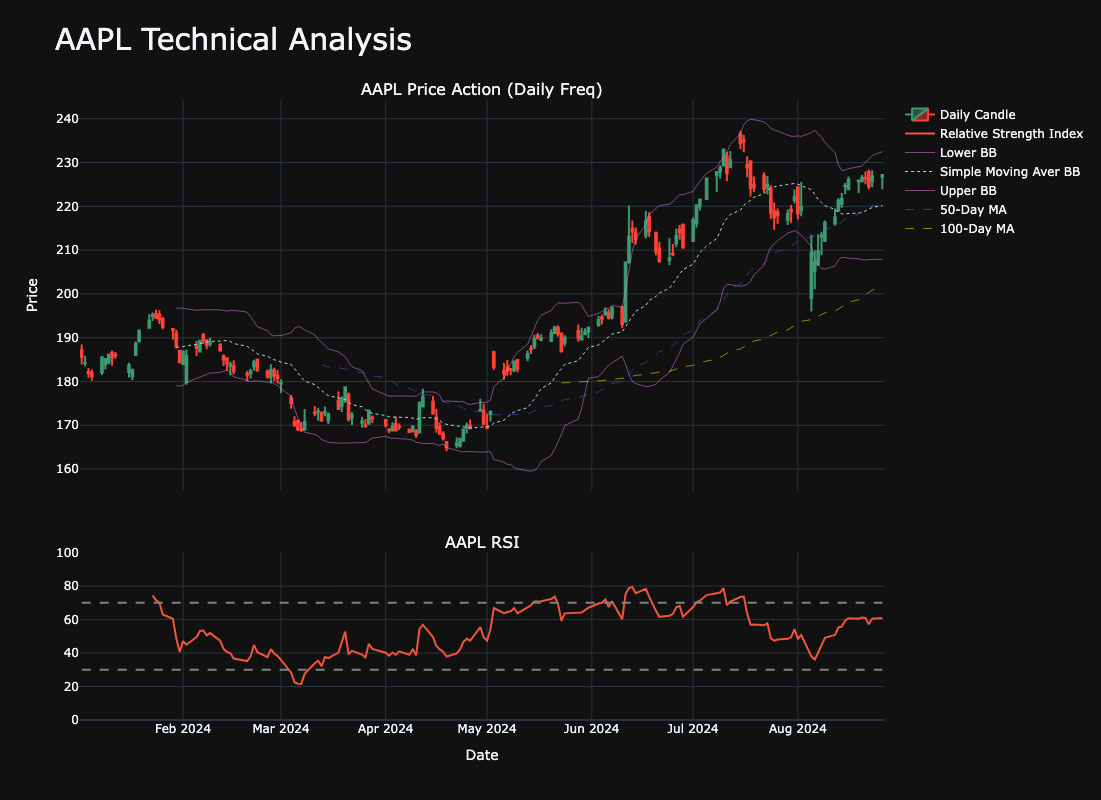

In [5]:
# COST, AAPL, CRM

# Sold on 08/19/2024:
# AAPL - 225.65
# COST - 871.96
# CRM - 264.73

plot_stock_ta("AAPL", end_date=today)

[*********************100%%**********************]  1 of 1 completed


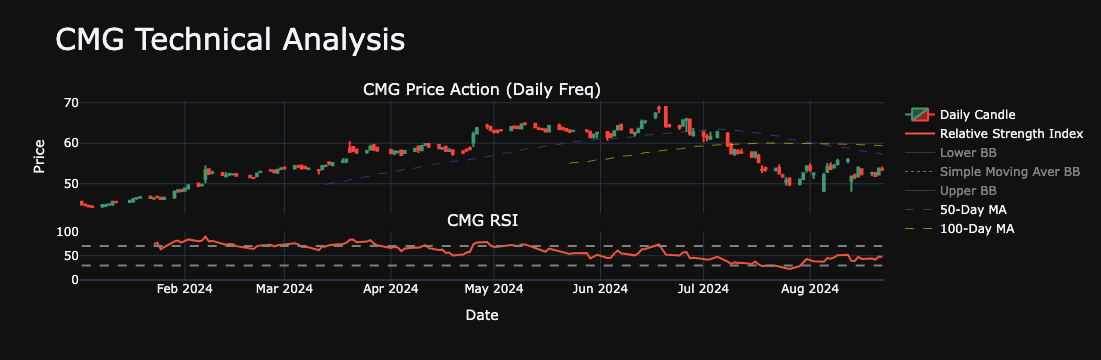

In [16]:
plot_stock_ta("CMG", end_date=today)

In [7]:
df = yf.download("NVDA,^GSPC", start="2023-01-01", end=today)

[*********************100%%**********************]  2 of 2 completed


In [8]:
df

Price        Adj Close                    Close                     High  \
Ticker            NVDA        ^GSPC        NVDA        ^GSPC        NVDA   
Date                                                                       
2023-01-03   14.306805  3824.139893   14.315000  3824.139893   14.996000   
2023-01-04   14.740556  3852.969971   14.749000  3852.969971   14.853000   
2023-01-05   14.256833  3808.100098   14.265000  3808.100098   14.564000   
2023-01-06   14.850493  3895.080078   14.859000  3895.080078   15.010000   
2023-01-09   15.619054  3892.090088   15.628000  3892.090088   16.056000   
...                ...          ...         ...          ...         ...   
2024-08-20  127.250000  5597.120117  127.250000  5597.120117  129.880005   
2024-08-21  128.500000  5620.850098  128.500000  5620.850098  129.350006   
2024-08-22  123.739998  5570.640137  123.739998  5570.640137  130.750000   
2024-08-23  129.369995  5634.609863  129.369995  5634.609863  129.600006   
2024-08-26  126.459999  5616.839844  126.459999  5616.839844  131.259995   

Price                           Low                     Open               \
Ticker            ^GSPC        NVDA        ^GSPC        NVDA        ^GSPC   
Date                                                                        
2023-01-03  3878.459961   14.096000  3794.330078   14.851000  3853.290039   
2023-01-04  3873.159912   14.241000  3815.770020   14.567000  3840.360107   
2023-01-05  3839.739990   14.148000  3802.419922   14.491000  3839.739990   
2023-01-06  3906.189941   14.034000  3809.560059   14.474000  3823.370117   
2023-01-09  3950.570068   15.141000  3890.419922   15.284000  3910.820068   
...                 ...         ...          ...         ...          ...   
2024-08-20  5620.509766  125.889999  5585.500000  128.399994  5602.879883   
2024-08-21  5632.680176  126.660004  5591.569824  127.320000  5603.089844   
2024-08-22  5643.220215  123.099998  5560.950195  130.020004  5637.770020   
2024-08-23  5641.819824  125.220001  5585.160156  125.860001  5602.490234   
2024-08-26  5651.620117  124.370003  5602.339844  129.570007  5639.660156   

Price          Volume              
Ticker           NVDA       ^GSPC  
Date                               
2023-01-03  401277000  3959140000  
2023-01-04  431324000  4414080000  
2023-01-05  389168000  3893450000  
2023-01-06  405044000  3923560000  
2023-01-09  504231000  4311770000  
...               ...         ...  
2024-08-20  300087400  2994420000  
2024-08-21  257883600  3119670000  
2024-08-22  376189100  2981530000  
2024-08-23  323230300  3291940000  
2024-08-26  331964700  2938570000  

[414 rows x 12 columns]

In [6]:
def download_and_format(tickers:str, start:str="2023-01-01", end:str=pd.Timestamp.today(), interval:str="1d"):
    
    # Download using yfinance API
    df = yf.download(tickers, start=start, end=end, interval=interval)
    
    # Formatting
    df.sort_index(axis=1, inplace=True)
    df = df.stack(future_stack=True).reset_index()  # future_stack required due to future deprecation
    df.columns.name = None
    df = df.dropna(subset="Open")
    return df

In [259]:
df_a = download_and_format("NVDA, ^GSPC")

[*********************100%%**********************]  2 of 2 completed


In [260]:
df_a

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-01-03,NVDA,14.306805,14.315000,14.996000,14.096000,14.851000,401277000
1,2023-01-03,^GSPC,3824.139893,3824.139893,3878.459961,3794.330078,3853.290039,3959140000
2,2023-01-04,NVDA,14.740556,14.749000,14.853000,14.241000,14.567000,431324000
3,2023-01-04,^GSPC,3852.969971,3852.969971,3873.159912,3815.770020,3840.360107,4414080000
4,2023-01-05,NVDA,14.256832,14.265000,14.564000,14.148000,14.491000,389168000
...,...,...,...,...,...,...,...,...
825,2024-08-23,^GSPC,5634.609863,5634.609863,5641.819824,5585.160156,5602.490234,3291940000
826,2024-08-26,NVDA,126.459999,126.459999,131.259995,124.370003,129.570007,331964700
827,2024-08-26,^GSPC,5616.839844,5616.839844,5651.620117,5602.339844,5639.660156,2938570000
828,2024-08-27,NVDA,128.300003,128.300003,129.199997,123.879997,125.029999,298623199


In [92]:
df_a["future_close"] = df_a.groupby("Ticker")["Close"].transform(lambda x: x.shift(-20))

In [93]:
pd.concat(
    [
        df_a.query("Ticker == 'NVDA'").reset_index(drop=True).loc[0:7, ["Ticker", "Date", "Close", "future_close"]],
         df_a.query("Ticker == 'NVDA'").reset_index(drop=True).loc[18:25, ["Ticker", "Date", "Close", "future_close"]]
    ], axis=0)

,Ticker,Date,Close,future_close
0,NVDA,2023-01-03,14.315000,20.943001
1,NVDA,2023-01-04,14.749000,21.709000
2,NVDA,2023-01-05,14.265000,21.100000
3,NVDA,2023-01-06,14.859000,21.089001
4,NVDA,2023-01-09,15.628000,22.173000
5,NVDA,2023-01-10,15.909000,22.205000
6,NVDA,2023-01-11,16.000999,22.337000
7,NVDA,2023-01-12,16.511000,21.264999
18,NVDA,2023-01-30,19.162001,23.216000
19,NVDA,2023-01-31,19.537001,22.698000


In [20]:
df_a

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,previous_close
0,2023-01-03,NVDA,14.306805,14.315000,14.996000,14.096000,14.851000,4.012770e+08,NaN
1,2023-01-03,^GSPC,3824.139893,3824.139893,3878.459961,3794.330078,3853.290039,3.959140e+09,NaN
2,2023-01-04,NVDA,14.740556,14.749000,14.853000,14.241000,14.567000,4.313240e+08,14.315000
3,2023-01-04,^GSPC,3852.969971,3852.969971,3873.159912,3815.770020,3840.360107,4.414080e+09,3824.139893
4,2023-01-05,NVDA,14.256833,14.265000,14.564000,14.148000,14.491000,3.891680e+08,14.749000
...,...,...,...,...,...,...,...,...,...
824,2024-08-23,NVDA,129.369995,129.369995,129.600006,125.220001,125.860001,3.232303e+08,123.739998
825,2024-08-23,^GSPC,5634.609863,5634.609863,5641.819824,5585.160156,5602.490234,3.291940e+09,5570.640137
826,2024-08-26,NVDA,126.459999,126.459999,131.259995,124.370003,129.570007,3.319647e+08,129.369995
827,2024-08-26,^GSPC,5616.839844,5616.839844,5651.620117,5602.339844,5639.660156,2.938570e+09,5634.609863


In [33]:
df_a[["Ticker","Date", "Close", "previous_close"]].reset_index()

,index,Ticker,Date,Close,previous_close
0,2,NVDA,2023-01-04,14.749000,14.315000
1,3,^GSPC,2023-01-04,3852.969971,3824.139893
2,4,NVDA,2023-01-05,14.265000,14.749000
3,5,^GSPC,2023-01-05,3808.100098,3852.969971
4,6,NVDA,2023-01-06,14.859000,14.265000
...,...,...,...,...,...
822,824,NVDA,2024-08-23,129.369995,123.739998
823,825,^GSPC,2024-08-23,5634.609863,5570.640137
824,826,NVDA,2024-08-26,126.459999,129.369995
825,827,^GSPC,2024-08-26,5616.839844,5634.609863


In [39]:
df_a = df_a.dropna(subset="previous_close")
df_a["percent_change"] = (df_a["Close"] / df_a["previous_close"] - 1) * 100
df_a["relative_performance"] = 1
rel = df_a.query("Ticker == '^GSPC'").merge(df_a.query("Ticker == 'NVDA'"), on="Date", suffixes=("_S&P", "_NVDA"))

In [36]:
(14.749000 / 14.315000 - 1) * 100

3.031784841075802

In [116]:
df_a = download_and_format("NVDA" + ",^GSPC")

rel = df_a.query("Ticker == '^GSPC'")[["Ticker", "Date", "Close"]].merge(
    df_a.query("Ticker == 'NVDA'")[["Ticker", "Date", "Close"]], on="Date", suffixes=("_S&P", f"_{ticker}"))

[*********************100%%**********************]  2 of 2 completed


In [117]:
rel

,Ticker_S&P,Date,Close_S&P,Ticker_AAPL,Close_AAPL
0,^GSPC,2023-01-03,3824.139893,NVDA,14.315000
1,^GSPC,2023-01-04,3852.969971,NVDA,14.749000
2,^GSPC,2023-01-05,3808.100098,NVDA,14.265000
3,^GSPC,2023-01-06,3895.080078,NVDA,14.859000
4,^GSPC,2023-01-09,3892.090088,NVDA,15.628000
...,...,...,...,...,...
409,^GSPC,2024-08-20,5597.120117,NVDA,127.250000
410,^GSPC,2024-08-21,5620.850098,NVDA,128.500000
411,^GSPC,2024-08-22,5570.640137,NVDA,123.739998
412,^GSPC,2024-08-23,5634.609863,NVDA,129.369995


In [467]:
def plot_rel_performance(ticker:str, start:str="2023-01-01", end:str=pd.Timestamp.today()):
    """ 
    Plot the relative performance of a stock vs the S&P, normalized so the initial value will be equal to 1

    Args:
    ---------------------
    ticker:str | stock symbol, case-insensitive
    start:str | date to begin analysis
    end:str | date to end analysis
    
    Returns:
    ---------------------
    None:fig | plotly figure showing relative performance of stock to the index
    
    Raises:
    ---------------------
    IndexError: single positional indexer is out-of-bounds if ticker is not a valid stock symbol

    Ex: plot_rel_performance("NVDA", start="2024-07-01", end="2024-08-24")
    """
    # from utils import download_and_format

    ticker = ticker.upper()
    
    if isinstance(end, pd.Timestamp):
        end_label = end.date()
    else:
        end_label = end

    # Transform data into useful format
    df_a = download_and_format(ticker + ",^GSPC", start=start, end=end)
    rel = df_a.query("Ticker == '^GSPC'")[["Ticker", "Date", "Close"]].merge(
        df_a.query("Ticker == @ticker")[["Ticker", "Date", "Close"]], on="Date", suffixes=("_S&P", f"_{ticker}"))
    rel.set_index("Date", inplace=True)
    rel["Relative Performance"] = (rel[f"Close_{ticker}"] / rel["Close_S&P"] / (rel[f"Close_{ticker}"].iloc[0] / rel["Close_S&P"].iloc[0])\
                                   - 1)  # Making this value a percentage of relative performance handled by "tickformat"
    
    # Plot the figure
    fig = make_subplots(rows=2, cols=2, subplot_titles=[
        f"Relative Performance of {ticker} to the S&P 500<br><sup>From {start} to {end} | A Value of 1 Signifies Parity</sup>",
                                                    f"{ticker} Price Action", "S&P Price Action"], shared_xaxes=True,
                       specs=[[{"colspan": 2}, None],  # First row spans both columns
               [{}, {}]])
    
    fig.add_trace(go.Scatter(x=rel.index, y=rel["Relative Performance"], name="Relative Performance", mode="lines"), 
                  row=1, col=1)
    fig.update_traces(hovertemplate="Date: %{x}<br> Relative Performance: %{y:.2%}<extra></extra>")
    
    fig.add_trace(go.Scatter(x=[rel.index[0], rel.index[-1]], y = [rel["Relative Performance"].iloc[0], rel["Relative Performance"].iloc[0]],
                             name = "Equal Performance", line={"dash":"dot"}))
    
    
    fig.add_trace(go.Scatter(x=df_a.query("Ticker == @ticker")["Date"], y=df_a.query("Ticker == @ticker")["Close"],
                            name=ticker, mode="lines"), row=2, col=1)
    fig.update_traces(row=2, col=1, hovertemplate="Date: %{x}<br> Price: %{y:$,.2f}<extra></extra>")
    
    fig.add_trace(go.Scatter(x=df_a.query("Ticker == '^GSPC'")["Date"], y=df_a.query("Ticker == '^GSPC'")["Close"],
                            name="S&P 500", mode="lines"), row=2, col=2)
    fig.update_traces(row=2, col=2, hovertemplate="Date: %{x}<br> Value: %{y:,.2f}<extra></extra>")
    
    fig.update_layout(yaxis = {"showticklabels":True, "tickformat":".2%"},
                      yaxis2 = {"showticklabels":True, "tickformat":"$,.2f"},
                     height=550,
                     template="plotly_dark",
                    yaxis_title="Relative Performance",
                    yaxis2_title=f"{ticker} Price",
                    yaxis3_title="S&P 500 Price"
    )
    
    fig.add_annotation(
        text="Date",  # The text of the x-axis label
        xref="paper", yref="paper",  # Reference to the entire figure
        x=0.5, y=-0.15,  # Position the label at the bottom center
        showarrow=False,
        font={"size":16, "weight":"normal"}  # Adjust the font size if needed
    )
    

    return fig

In [468]:
end = pd.Timestamp.today()
print(type(end))
if isinstance(end, pd.Timestamp):
    print("told you")

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
told you


### Function Call

In [5]:
plot_rel_performance(ticker="nvda", start="2024-08-01", end="2024-08-26")

NameError: name 'download_and_format' is not defined

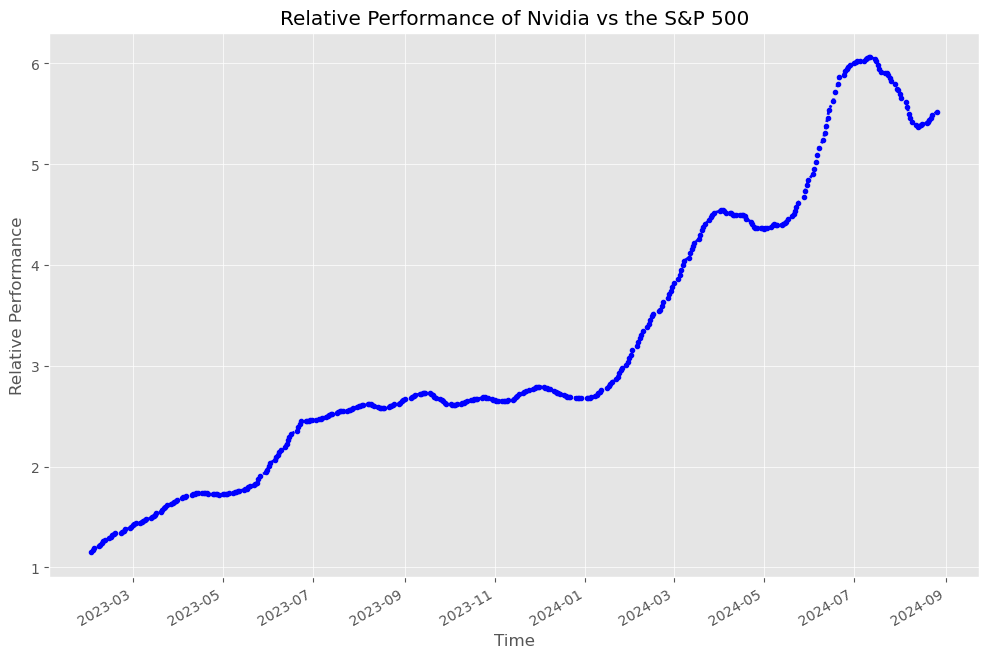

In [66]:
plt.style.use("ggplot")
# rel.set_index("Date", inplace=True)
(rel["Close_NVDA"] / rel["Close_S&P"] / (rel["Close_NVDA"].iloc[0] / rel["Close_S&P"].iloc[0])).rolling(20).mean().plot(
    kind="line",
    title="Relative Performance of Nvidia vs the S&P 500",
    xlabel = "Time",
    ylabel = "Relative Performance",
    linestyle = ":",
    color = "blue",
    marker = ".",
    figsize=(12,8)
);

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

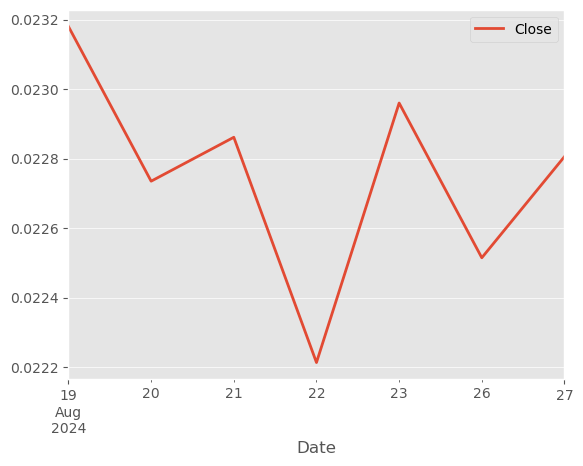

In [98]:
sp = yf.download("^GSPC", "2024-08-19", pd.Timestamp.today())
nvda = yf.download("NVDA", "2024-08-19", pd.Timestamp.today())

(nvda[["Close"]] / sp[["Close"]]).plot()